PROYECTO DE BI PARA ESCUELA DEPORTIVA, TABLA PAGO

PAQUETES E IMPORTACIONES A UTILIZAR

In [2]:
#crear entorno virtual en la carpeta del proyecto:
# python -m venv env o mi_entorno
# env/Script/Activate         para activar el entorno virtual en windows
# source env/bin/activate     para activar en linux
#instalar las siguientes librerias

#desactivar / deactivate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #pip install scikit-learn


Cargar los datos

In [3]:
data = pd.read_json('data/datos_sinprocesar/pago_202510101518.json')

Visualizar los datos

In [4]:
pago_data = data['pago']
df_pagos = pd.json_normalize(pago_data)

df_pagos.head()


,id_pago,fecha,valor_pago,periodo,alumno_id
0,1,2025-03-13 10:49:09,108322.02,2025-02,314
1,2,2025-03-03 20:18:22,145432.21,2025-03,375
2,3,2024-10-12 08:09:12,50000.00,2025-02,54
3,4,2025-03-16 00:39:41,50000.00,2025-05,529
4,5,2024-11-11 11:04:31,50000.00,oRjibsu,531


Verificar la estructura de los datos

In [5]:
df_pagos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_pago     1000 non-null   int64  
 1   fecha       1000 non-null   object 
 2   valor_pago  906 non-null    float64
 3   periodo     920 non-null    object 
 4   alumno_id   1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


Estadistico

In [6]:
df_pagos.describe()

,id_pago,valor_pago,alumno_id
count,1000.000000,906.000000,1000.000000
mean,500.500000,59761.562108,493.975000
std,288.819436,24396.337754,294.261979
min,1.000000,20041.860000,1.000000
25%,250.750000,50000.000000,243.750000
50%,500.500000,50000.000000,479.500000
75%,750.250000,50000.000000,756.000000
max,1000.000000,149256.130000,999.000000


Estadistica de Campos Categoricos

In [7]:
df_pagos.describe(include='O')

,fecha,periodo
count,1000,920
unique,1000,140
top,2025-03-13 10:49:09,2025-02
freq,1,174


Visualizar el tamaño del dataset (dataframe)

In [8]:
df_pagos.shape

(1000, 5)

OUTLIERS - Modo Grafico

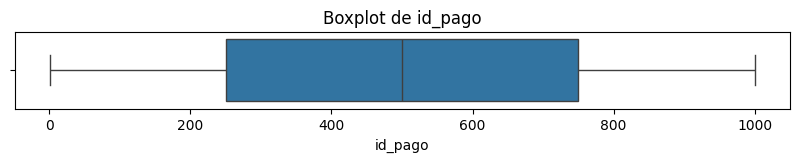

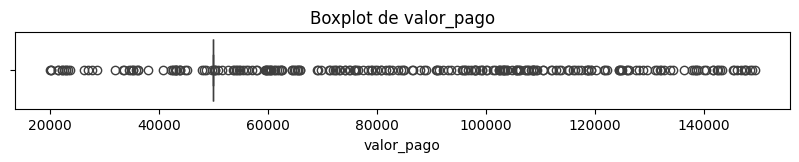

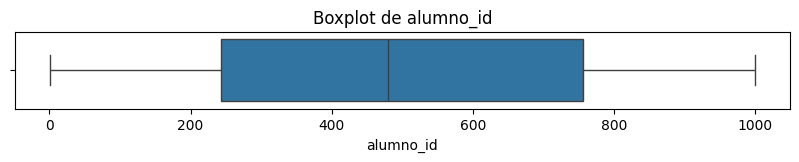

In [9]:
cols = df_pagos.select_dtypes(include=['number']).columns
for col in cols:
    plt.figure(figsize=(10, 1))  
    sns.boxplot(data=df_pagos, x=col) 
    plt.title(f'Boxplot de {col}')  
    plt.show()  

OUTLIERS - Calculado

rango intercuartilico IRQ

In [10]:
outliers = {}

for col in cols:
    Q1 = np.percentile(df_pagos[col], 25)  
    Q3 = np.percentile(df_pagos[col], 75)  
    IQR = Q3 - Q1  

    LI = Q1 - 1.5 * IQR 
    LS = Q3 + 1.5 * IQR 


    outliers_col = df_pagos[(df_pagos[col] < LI) | (df_pagos[col] > LS)][col]
    outliers[col] = outliers_col


    print(f'{col}: {len(outliers_col)} outliers')
    print(f'  Límites: [{LI:.2f}, {LS:.2f}]')
    print(f'  Min: {df_pagos[col].min()}, Max: {df_pagos[col].max()}')
    print('-' * 40)

id_pago: 0 outliers
  Límites: [-498.50, 1499.50]
  Min: 1, Max: 1000
----------------------------------------
valor_pago: 0 outliers
  Límites: [nan, nan]
  Min: 20041.86, Max: 149256.13
----------------------------------------
alumno_id: 0 outliers
  Límites: [-524.62, 1524.38]
  Min: 1, Max: 999
----------------------------------------


STR

In [11]:
outliers={}
for col in cols:
  mean=df_pagos[col].mean()
  std=df_pagos[col].std()

  outliers[col] = (df_pagos[col] > (mean + 3 *std)).sum() + (df_pagos[col] < (mean - 3 *std)).sum()

print(outliers)

{'id_pago': np.int64(0), 'valor_pago': np.int64(26), 'alumno_id': np.int64(0)}


Histogramas - Outliers

<Axes: xlabel='valor_pago', ylabel='Count'>

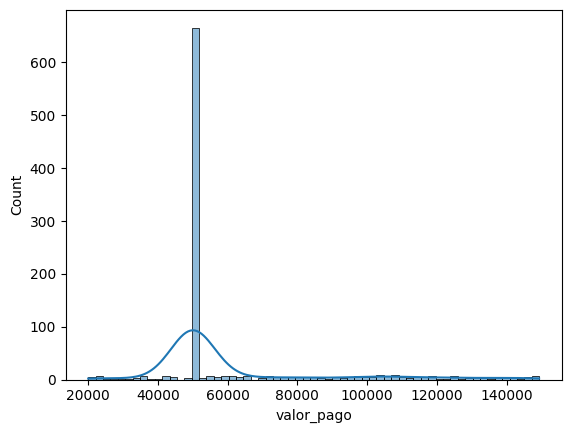

In [12]:
sns.histplot(data=df_pagos, x='valor_pago', kde=True)


Valores Nulos

In [34]:
df_pagos.isna().mean() * 100

id_pago       0.0
fecha         0.0
valor_pago    9.4
periodo       8.0
alumno_id     0.0
dtype: float64

Eliminar valores Nulos

In [31]:
# Eliminar filas con valores nulos en la columna y filas donde el nombre esta vacio (cadena vacia o solo espacios)
df_pagos = df_pagos[df_pagos['fecha'].notna() & (df_pagos['fecha'] != '')]
df_pagos = df_pagos[df_pagos['valor_pago'].notna() & (df_pagos['valor_pago'] != '')]
df_pagos = df_pagos[df_pagos['periodo'].notna() & (df_pagos['periodo'] != '')]
df_pagos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 710
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_pago     503 non-null    int64  
 1   fecha       503 non-null    object 
 2   valor_pago  503 non-null    float64
 3   periodo     503 non-null    object 
 4   alumno_id   503 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 23.6+ KB


Eliminar datos inconsistentes

In [32]:
df_pagos = df_pagos[df_pagos['periodo'].str.match(r'^\d{4}-\d{2}$')] 


df_pagos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 710
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_pago     503 non-null    int64  
 1   fecha       503 non-null    object 
 2   valor_pago  503 non-null    float64
 3   periodo     503 non-null    object 
 4   alumno_id   503 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 23.6+ KB


Guardar data limpia de valores nulos eliminados

In [36]:
pago_list = df_pagos.to_dict(orient='records')

json_data = {"pago": pago_list}


import json
with open('data/datos_preprocesados/pago.json', 'w') as f:
    json.dump(json_data, f, indent=4)

Imputar datos

In [37]:
impute = SimpleImputer(strategy='median')

print('Mediana inicial de valor_pago: ', df_pagos['valor_pago'].median())
salida = impute.fit_transform(df_pagos[['valor_pago']])
salida = pd.DataFrame(salida, columns=['valor_pago'])
df_pagos['valor_pago'] = salida['valor_pago']
print('\nNulos en los nuevos datos: ', df_pagos['valor_pago'].isna().sum())
print('\nMediana de los nuevos datos de valor_pago: ', df_pagos['valor_pago'].median())

Mediana inicial de valor_pago:  50000.0

Nulos en los nuevos datos:  150

Mediana de los nuevos datos de valor_pago:  50000.0
